**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import glob
import os
import visualkeras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from keras import regularizers
from keras.layers.core import Dropout
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16

#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.naive_bayes import GaussianNB

**Resizing the image and Loading the dataset**

In [2]:
# re-size all the images
IMAGE_SIZE = [224, 224]
#loading the data
train_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\train"
test_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\test"
val_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\val"

**Adding Preprocessing layers for ResNet50 MODEL**

In [4]:
resnet50_model = ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [6]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
# useful for getting number of classes
folders = glob(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\*")

In [8]:
# don't train existing weights
for layer in resnet50_model.layers:
  layer.trainable = False
# our layers - you can add more if you want
#x=Conv2D(64)
x= Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),MaxPooling2D(pool_size=(2,2))
x= Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),MaxPooling2D(pool_size=(2,2))
x= Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),MaxPooling2D(pool_size=(2,2))
x= Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),MaxPooling2D(pool_size=(2,2)),
#x= Conv2D(6,3,3,input_shape=(224,224,3),activation='relu')
x = Flatten()(resnet50_model.output)
x = Dense(1000, activation='relu')(x)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50_model.input, outputs=prediction)

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

**Visualization of the model**

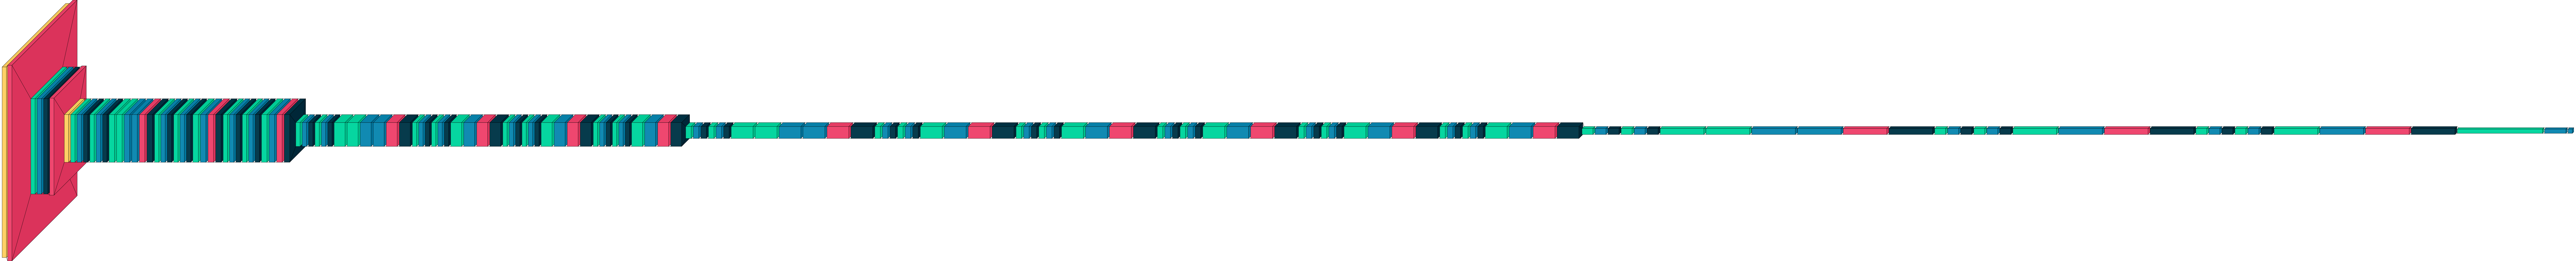

In [10]:
visualkeras.layered_view(model).show() # display using your system viewer
##visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

**Data Augmentation and preparing Image data generator**

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 500 images belonging to 2 classes.


**Callback functions**

In [14]:
#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [15]:
#ModelCheckpoint callback saves a model at some interval. 
filepath=r"C:\Users\Computing\Downloads\data-task1\data-task1\ResNet50_saved_models.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [16]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, mode='min', verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for eight consecutive epochs.

In [17]:
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logsvgg.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

**Fit the model**

In [18]:
#Training the neural network
#We can now use these generators to train our model. 
#Give this a name so we can call it later for plotting loss, accuracy etc. as a function of epochs.
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
 callbacks= callbacks_list)

model.save('Resnet50new_model.hdf5')  # always save your weights after training or during training

<ipython-input-18-1af58c298f4c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
94/94 [==============================] - 124s 1s/step - loss: 2.5861 - accuracy: 0.7173 - val_loss: 0.6674 - val_accuracy: 0.7900
Epoch 2/25
94/94 [==============================] - 122s 1s/step - loss: 0.6928 - accuracy: 0.7247 - val_loss: 0.5509 - val_accuracy: 0.6980
Epoch 3/25
94/94 [==============================] - 121s 1s/step - loss: 0.5719 - accuracy: 0.7457 - val_loss: 0.8009 - val_accuracy: 0.4620
Epoch 4/25
94/94 [==============================] - 122s 1s/step - loss: 0.6099 - accuracy: 0.7433 - val_loss: 1.0168 - val_accuracy: 0.7900
Epoch 5/25
94/94 [==============================] - 122s 1s/step - loss: 0.7485 - accuracy: 0.7170 - val_loss: 0.5154 - val_accuracy: 0.7880
Epoch 6/25
94/94 [==============================] - 122s 1s/step - loss: 0.5294 - accuracy: 0.7663 - val_loss: 0.4794 - val_accuracy: 0.7880
Epoch 7/25
94/94 [==============================] - 122s 1s/step - loss: 0.5187 - accuracy: 0.7680 - val_loss: 0.4832 - val_accuracy: 0.7940
Epoch 8/25
94

**Plotting the Loss and Accuracy Curve**

Values stored in history are ... 
 {'loss': [2.5860886573791504, 0.6928303241729736, 0.5718874335289001, 0.6099244952201843, 0.7484627366065979, 0.5294093489646912, 0.5187260508537292, 0.5152637958526611, 0.52536541223526, 0.5804159641265869, 0.5335236191749573, 0.5589157938957214, 0.48653170466423035, 0.49009567499160767], 'accuracy': [0.7173333168029785, 0.7246666550636292, 0.7456666827201843, 0.7433333396911621, 0.7170000076293945, 0.7663333415985107, 0.7680000066757202, 0.7639999985694885, 0.7699999809265137, 0.75, 0.7599999904632568, 0.7596666812896729, 0.7793333530426025, 0.781000018119812], 'val_loss': [0.6673861145973206, 0.5508663058280945, 0.8009217381477356, 1.0167688131332397, 0.5153921246528625, 0.4793809652328491, 0.4831543266773224, 0.4720308482646942, 0.46908238530158997, 0.47797736525535583, 0.4745144546031952, 0.5054223537445068, 0.4697306454181671, 0.47675397992134094], 'val_accuracy': [0.7900000214576721, 0.6980000138282776, 0.4620000123977661, 0.7900000214576721, 0

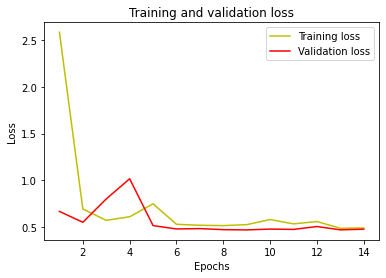

In [19]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Values stored in history are ... 
 {'loss': [2.5860886573791504, 0.6928303241729736, 0.5718874335289001, 0.6099244952201843, 0.7484627366065979, 0.5294093489646912, 0.5187260508537292, 0.5152637958526611, 0.52536541223526, 0.5804159641265869, 0.5335236191749573, 0.5589157938957214, 0.48653170466423035, 0.49009567499160767], 'accuracy': [0.7173333168029785, 0.7246666550636292, 0.7456666827201843, 0.7433333396911621, 0.7170000076293945, 0.7663333415985107, 0.7680000066757202, 0.7639999985694885, 0.7699999809265137, 0.75, 0.7599999904632568, 0.7596666812896729, 0.7793333530426025, 0.781000018119812], 'val_loss': [0.6673861145973206, 0.5508663058280945, 0.8009217381477356, 1.0167688131332397, 0.5153921246528625, 0.4793809652328491, 0.4831543266773224, 0.4720308482646942, 0.46908238530158997, 0.47797736525535583, 0.4745144546031952, 0.5054223537445068, 0.4697306454181671, 0.47675397992134094], 'val_accuracy': [0.7900000214576721, 0.6980000138282776, 0.4620000123977661, 0.7900000214576721, 0

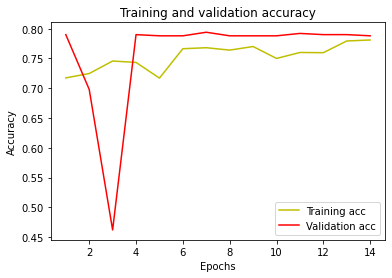

In [20]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluation part of the model**

In [21]:
#Evaluating the model
train_loss, train_acc = model.evaluate(training_set, steps=32)
validation_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 15s 452ms/step - loss: 0.4768 - accuracy: 0.7880
Train: 0.771, Test: 0.788


In [22]:
train_loss, train_acc = model.evaluate(training_set, steps=32)
test_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 15s 435ms/step - loss: 0.4768 - accuracy: 0.7880
Train: 0.792, Test: 0.788


In [23]:
# Evaluate the model
scores = model.evaluate_generator(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-23-d33ba6da31cf>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_set)


Loss of the model: 0.48
Test Accuracy: 78.80%


In [24]:
scores = model.evaluate_generator(training_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Training Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-24-ddfd143517da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(training_set)


Loss of the model: 0.47
Training Accuracy: 78.73%


**Confusion matrix**

In [25]:
test_pred = model.predict_generator(test_set)
y_pred = np.argmax(test_pred, axis=1)

<ipython-input-25-c14bf3b956d5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


<Figure size 432x288 with 0 Axes>

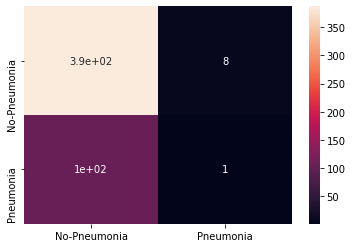

<Figure size 432x288 with 0 Axes>

In [26]:
#Visualizing confusion matrix
cm = confusion_matrix(test_set.labels,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['No-Pneumonia', 'Pneumonia'],
            yticklabels=['No-Pneumonia', 'Pneumonia'])
plt.figure()
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')

**TP=TRUE POSITIVE, FP=FALSE POSITIVE, TN=TRUE NEGATIVE, FN=FALSE NEGATIVE**


In [27]:
TN, FP, FN, TP = cm.ravel()
print(TN, FP, FN, TP)

387 8 104 1


**Confusion matrix, Precision-Recall, TP/FP rates, f1-score**

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
test_pred = model.predict_generator(test_set)
#preds = model.predict(test_set)

#acc = accuracy_score([y_pred, np.round(test_pred)]*100).transpose()
acc = accuracy_score(test_set.labels, np.round(y_pred))*100
cm = confusion_matrix(test_set.labels, np.round(y_pred))
classify_report = classification_report(test_set.labels, np.round(y_pred))


TN, FP, FN, TP = cm.ravel() 
print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
#precision = TP/(TP+FP)*100
#recall = TP/(TP+FN)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

# print classification report
print('Classification report on test data')
print(classify_report)

<ipython-input-28-44768ab77d36>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


CONFUSION MATRIX ------------------
[[387   8]
 [104   1]]

TEST METRICS ----------------------
Accuracy: 77.60000000000001%
Precision: 0.1111111111111111%
Recall: 0.009523809523809525%
F1-score: 0.01754385964912281

TRAIN METRIC ----------------------
Train acc: 78.1%
Classification report on test data
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       395
           1       0.11      0.01      0.02       105

    accuracy                           0.78       500
   macro avg       0.45      0.49      0.45       500
weighted avg       0.65      0.78      0.69       500



**TPR=TRUE POSITIVE RATE, FPR=FALSE POSITIVE RATE, TNR=TRUE NEGATIVE RATE, FNR=FALSE NEGATIVE RATE**

In [29]:
TPR = TP / (TP + FN)
TNR = TN / (TP + TN)
FPR = FP / (TP + FN)
FNR = FN / (FP + TN)

print('TRUE POSITIVE RATE is: {}'.format(TPR))
print('TRUE NEGATIVE RATE is: {}'.format(TNR))
print('FALSE POSITIVE RATE is: {}'.format(FPR))
print('FALSE NEGATIVE RATE is: {}'.format(FNR))

TRUE POSITIVE RATE is: 0.009523809523809525
TRUE NEGATIVE RATE is: 0.9974226804123711
FALSE POSITIVE RATE is: 0.0761904761904762
FALSE NEGATIVE RATE is: 0.26329113924050634


**Prediction of the model**

In [30]:
from PIL import Image, ImageEnhance
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

Person is Affected By PNEUMONIA


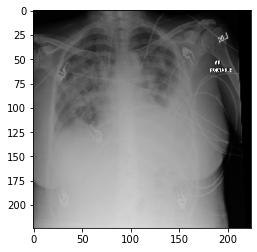

In [31]:
model=load_model('CNN_model1.hdf5')
img=image.load_img(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\pneumonia\00a05408-8291-4231-886e-13763e103161.png",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])

if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Person is not affected by PNEUMONIA")
plt.figure()
plt.imshow(img)

Person is not affected by PNEUMONIA


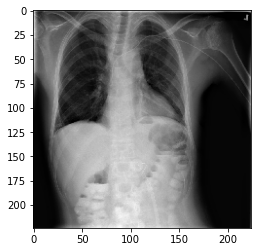

In [32]:
model=load_model('CNN_model1.hdf5')
img=image.load_img(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\no_pneumonia\0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0.png",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])

if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Person is not affected by PNEUMONIA")
    plt.figure()
plt.imshow(img)